# Анализ и предобработка
Для работы над задачей классификации будет использован Iris Dataset https://scikit-learn.org/stable/datasets/index.html#iris-dataset. Данный датасет загружается функцией sklearn.datasets.load_iris().

Из описания на сайте мы определяем основные ключи в объекте sklearn.utils.Bunch:

DESCR - строчное описание датасета;
data - данные с признаками;
feature_names - названия признаков;
target_names - названия классов ирисов;
targets - целочисленные индексы классов.

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data['DESCR'])
print(iris_data['target_names'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [4]:
feature_names = iris_data['feature_names']
df = pd.DataFrame(iris_data['data'], columns=feature_names)
species_names = iris_data['target_names']
target_idxs = iris_data['target']
df['species'] = species_names[target_idxs]

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

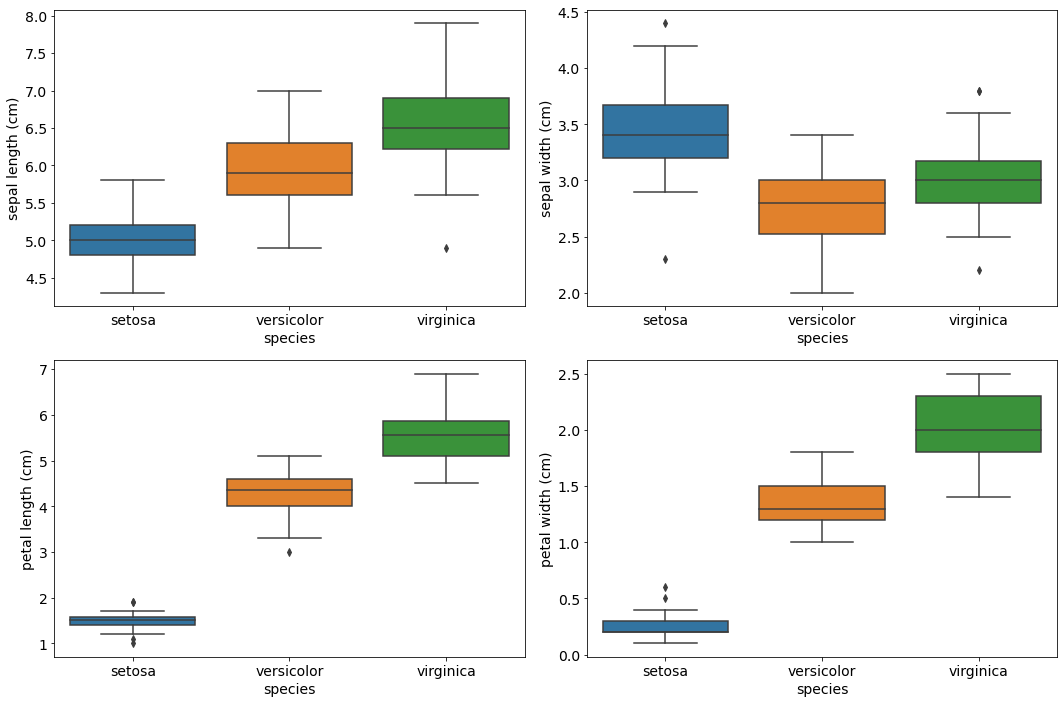

In [8]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.boxplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

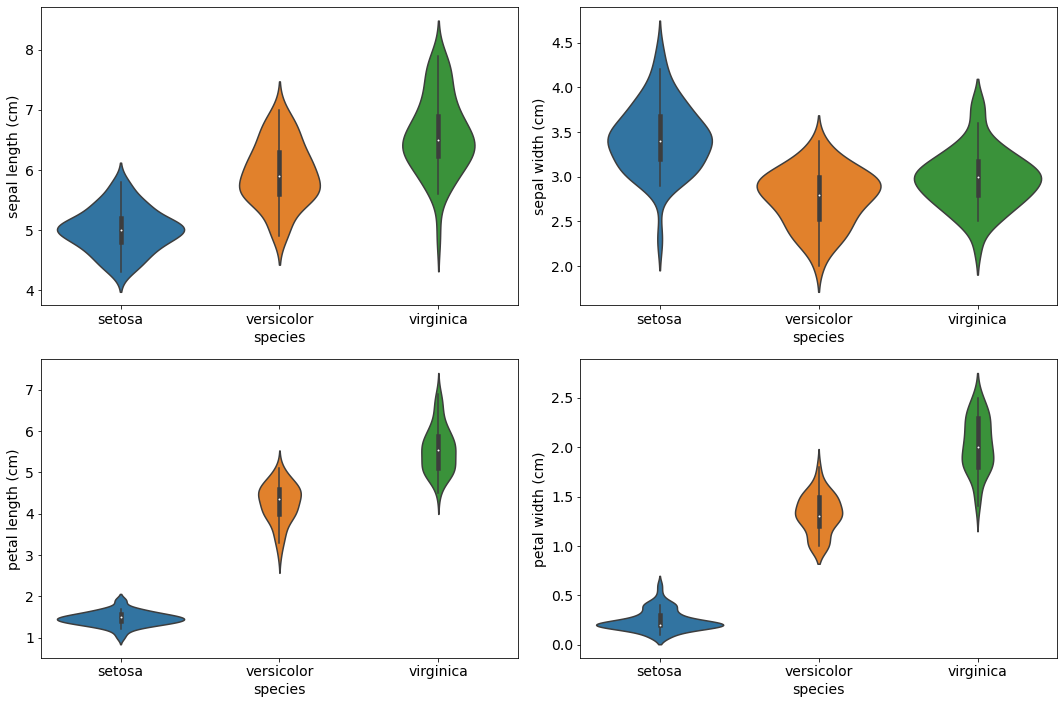

In [9]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.violinplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

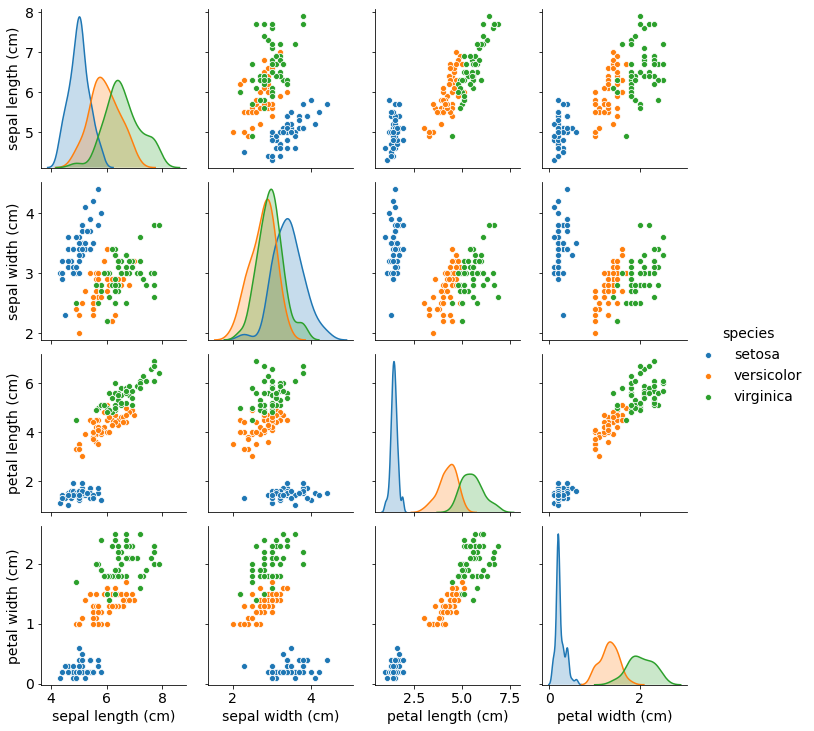

In [10]:
sns.pairplot(df, hue='species')

# Разработка модели
Теперь пора делать модель для мультиклассовой логистической регрессии.

In [11]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42

TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [12]:
from sklearn.linear_model import LogisticRegression
RANDOM_STATE = 42

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [13]:
sample = X_test.iloc[0]

prediction = logreg.predict([sample])
predict_proba = logreg.predict_proba([sample])
predict_log_proba = logreg.predict_log_proba([sample])

print(f'  Sample:\n{sample}')
print(f'  Prediction proba:\n{predict_proba[0]}')
print(f'  Prediction proba sum:\n{sum(predict_proba[0])}')
print(f'  Prediction log proba:\n{predict_log_proba[0]}')
print(f'  Prediction:\n{prediction}')
print(f'  Prediction name:\n{species_names[prediction]}')

  Sample:
sepal length (cm)    7.3
sepal width (cm)     2.9
petal length (cm)    6.3
petal width (cm)     1.8
Name: 107, dtype: float64
  Prediction proba:
[1.99458262e-06 3.30316324e-02 9.66966373e-01]
  Prediction proba sum:
1.0
  Prediction log proba:
[-13.12507574  -3.41028962  -0.03359156]
  Prediction:
[2]
  Prediction name:
['virginica']


In [14]:
print(f'  Classes: {logreg.classes_}')
print(f'  Weights:\n{logreg.coef_}')
print(f'  Bias:\n{logreg.intercept_}')

  Classes: [0 1 2]
  Weights:
[[-0.53386412  0.76928188 -2.22497251 -0.97108721]
 [ 0.41969567 -0.43035073 -0.09734193 -0.84011321]
 [ 0.11416844 -0.33893115  2.32231444  1.81120042]]
  Bias:
[  9.82948431   2.42239267 -12.25187699]


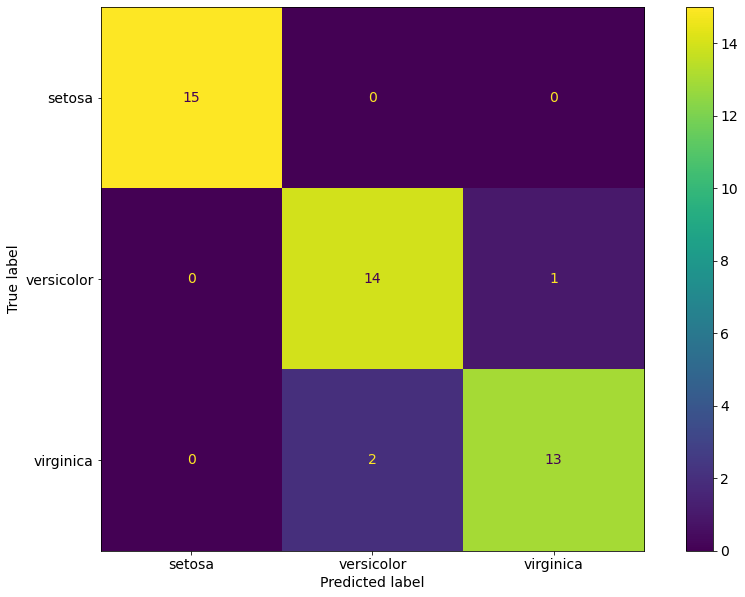

In [15]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

In [16]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Кросс-валидация

In [17]:
from sklearn.model_selection import cross_val_score

X = df[feature_names]
y = target_idxs

# Данная функция используется только для оценки 
#   (она обучает модель внутри, но не возвращает ее)
scores = cross_val_score(
    logreg,     # Модель для оценки
    X,          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.96658312 1.         0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.05)


# Задание
Разберитесь и отобразите ROC-кривую с помощью sklearn.metrics.roc_curve;



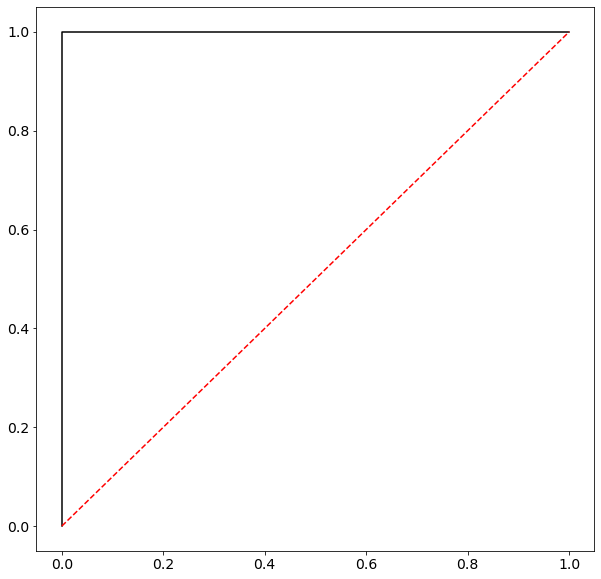

In [18]:
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=0)
iris=load_iris()
x=iris.data
y=iris.target
x,y=x[y!=2],y[y!=2]
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2)
y_score=clf.fit(X_train,y_train).predict_proba(X_test)
fpr,tpr,thre = roc_curve(y_test,y_score[:,1],pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
mean_tpr=0
mean_fpr=np.linspace(0,1,100)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='black',
         label='ROC curve(area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],
         color='red',
         linestyle='--')
plt.show()

In [21]:
# Оцените работу модели при использовании StandartScaler
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data

std_scaler = StandardScaler()

std_scaler.fit(X)
X_std = std_scaler.transform(X)

print(X_std)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

# Оцените работу модели при обучении на двух признаках (попробовать 2 пары признаков):sepal length (cm) + sepal width (cm); petal length (cm) + petal width (cm);

In [25]:
X = df[[feature_names[0],feature_names[1]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [26]:
X = df[[feature_names[2],feature_names[3]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Найдите лучшую пару признаков методом кросс-валидации на обучающих данных (перебрать все возможные пары);


In [27]:
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if (i<=j):
          continue 
        X = df[[feature_names[i],feature_names[j]]]
        y = target_idxs
        scores = cross_val_score(
             logreg,     # Модель для оценки
             X,          # Данные для обучения
             y,          # Разметка для обучения
             cv=5,       # Количество фолдов
             scoring='f1_macro'  # Желаемая метрика
        )
        print(f'Features:{feature_names[i],feature_names[j]}')
        print(f'Scores: {scores}')
        print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Features:('sepal width (cm)', 'sepal length (cm)')
Scores: [0.72222222 0.82949702 0.76608187 0.86666667 0.86807706]
F1 (macro):  0.81 (+/-  0.12)
Features:('petal length (cm)', 'sepal length (cm)')
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
Features:('petal length (cm)', 'sepal width (cm)')
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
Features:('petal width (cm)', 'sepal length (cm)')
Scores: [0.93333333 0.96658312 0.93265993 0.93265993 1.        ]
F1 (macro):  0.95 (+/-  0.05)
Features:('petal width (cm)', 'sepal width (cm)')
Scores: [0.93333333 0.96658312 0.89974937 0.93265993 0.96658312]
F1 (macro):  0.94 (+/-  0.05)
Features:('petal width (cm)', 'petal length (cm)')
Scores: [0.96658312 0.96658312 0.93265993 0.93333333 1.        ]
F1 (macro):  0.96 (+/-  0.05)


# Освойте и изучите работу подхода классификации К ближайших соседей (KNN), продемонстрируйте работу и основную суть метода, сравните с показателями логистической регрессии;



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(
      knn,     # Модель для оценки
      X,          # Данные для обучения
      y,          # Разметка для обучения
      cv=5,       # Количество фолдов
      scoring='f1_macro'  # Желаемая метрика
)
print(f'Features:{feature_names[i],feature_names[j]}')
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Features:('petal width (cm)', 'petal width (cm)')
Scores: [0.96658312 0.96658312 0.89769821 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.07)


# Оцените влияние аргумента n_neighbors на работу модели KNN (7 различных значений); постройте график или таблицу основных показателей метрик от значения количества соседей;

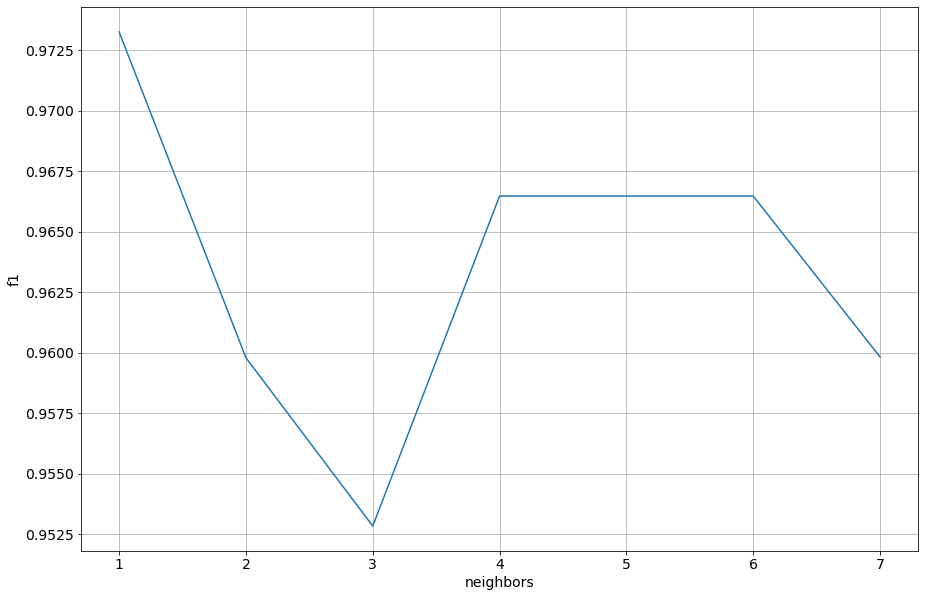

In [29]:
from sklearn.neighbors import KNeighborsClassifier
scr=[]
for K_n in range(1,8):
  knn = KNeighborsClassifier(n_neighbors=K_n)
  scores = cross_val_score(
      knn,     # Модель для оценки
      X,          # Данные для обучения
      y,          # Разметка для обучения
      cv=5,       # Количество фолдов
      scoring='f1_macro'  # Желаемая метрика
  )
  scr.append(scores.mean()) 
plt.plot(range(1,8),scr)
plt.grid(True)
plt.ylabel('f1')
plt.xlabel('neighbors')
plt.show()